In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers

#Load Data

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
print("Train shape:", x_train.shape, y_train.shape)
print("Test shape:", x_test.shape, y_test.shape)

Train shape: (60000, 28, 28) (60000,)
Test shape: (10000, 28, 28) (10000,)


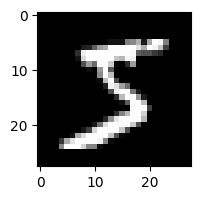

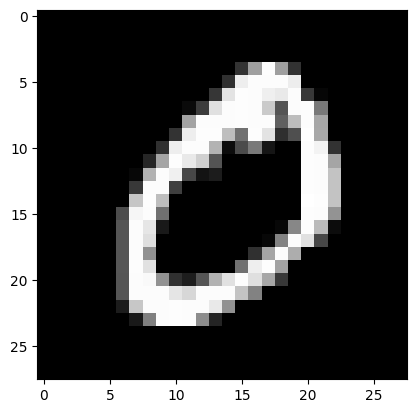

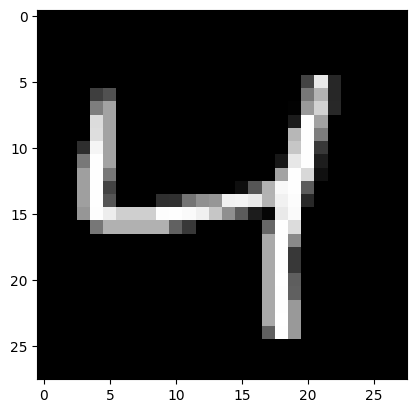

In [4]:
#Show some samples
plt.figure(figsize=(2, 2))
for i in range(3):
  plt.imshow(x_train[i], cmap='gray')
  plt.show()

# Preprocessing

- Original MNIST pixel values are integers 0–255 (grayscale intensity).

- Neural nets learn better when inputs are in a small range (e.g. 0–1 or -1–1).

- Prevents very large numbers in calculations.

- Makes gradients more stable during backpropagation.

- Speeds up convergence.

👉 Dividing by 255.0 scales all pixels to [0,1].
E.g., 0 → 0.0 (black), 255 → 1.0 (white).

In [5]:
#Normalization

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

- Right now, MNIST images have shape (N, 28, 28) → just height and width.

- But CNN layers expect inputs as (height, width, channels):

- Grayscale → 1 channel

- RGB → 3 channels

- RGBA → 4 channels

- So we reshape from:
    - Before: (60000, 28, 28)
    - After: (60000, 28, 28, 1) ✅

In [6]:
# Adding channel
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [7]:
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

# Build CNN Model

In [8]:
model = Sequential()

In [9]:
model = keras.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(16, kernel_size=3, activation='relu'),
    layers.MaxPooling2D(pool_size=2),
    layers.Conv2D(32, kernel_size=3, activation='relu'),
    layers.MaxPooling2D(pool_size=2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [10]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [11]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,714 (221.54 KB)

 Trainable params: 56,714 (221.54 KB)

 Non-trainable params: 0 (0.00 B)

# Train Model

In [12]:
callbacks = [
    keras.callbacks.ModelCheckpoint("mnist_best.h5", save_best_only=True, monitor="val_accuracy"),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)
]


In [13]:
history = model.fit(
    x_train, y_train,
    validation_split=0.1,
    epochs=5,
    batch_size=256,
    callbacks=callbacks
)

Epoch 1/5
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7553 - loss: 0.8407

211/211 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.7559 - loss: 0.8387 - val_accuracy: 0.9665 - val_loss: 0.1146
Epoch 2/5
210/211 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9644 - loss: 0.1193

211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9645 - loss: 0.1192 - val_accuracy: 0.9757 - val_loss: 0.0753
Epoch 3/5
210/211 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9748 - loss: 0.0817

211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9748 - loss: 0.0817 - val_accuracy: 0.9845 - val_loss: 0.0574
Epoch 4/5
207/211 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9817 - loss: 0.0607

211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9817 - loss: 0.0607 - val_accuracy: 0.9847 - val_loss: 0.0522
Epoch 5/5
203/211 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9841 - loss: 0.0514

211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9841 - loss: 0.0515 - val_accuracy: 0.9872 - val_loss: 0.0449


# Evaluate on test data

In [15]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9860 - loss: 0.0511
Test accuracy: 0.9878
